In [54]:
!nvidia-smi

Wed Oct 12 17:11:48 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.82.01    Driver Version: 470.82.01    CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    35W / 250W |  15977MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [55]:
! pip install opencv-pytho
! pip install opencv-contrib-python

ERROR: Could not find a version that satisfies the requirement opencv-pytho (from versions: none)
ERROR: No matching distribution found for opencv-pytho


In [113]:
 # import modules
import numpy as np
import pandas as pd
import cv2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping


from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
(x_train, y_train),(x_test,y_test)= cifar10.load_data()

In [119]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', ' dog', 'frog', 'horse', 'ship', 'trunk']

In [59]:
# convert x_train BGR to Grayscale
x_train_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train])
x_test_gray = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test])
x_train_gray.shape

(50000, 32, 32)

# Visualization 

In [60]:
### def plot_images(x_df, y_df, img_numer, number_images): ## plot x number of images
def plot_images(x_df, y_df, img_numer, number_images, color_map):
    # create figure
    fig_cols = 5
    color_map = ('gray' if color_map == 1 else 'viridis')
    fig_rows = -(-number_images//fig_cols)
    fig = plt.figure(figsize=(2*fig_cols, 2*fig_rows), linewidth=5, edgecolor="black")

    acc = 1
    for i in range(img_numer, img_numer+number_images):
        # Adds a subplot at the 1st position
        fig.add_subplot(-(-number_images//fig_cols), fig_cols, acc)

        # showing image
        plt.imshow(x_df[i], interpolation='spline16', cmap=color_map)
        plt.axis('off')
        plt.title(clasess[y_df[i][0]])
        acc +=1

    plt.show()

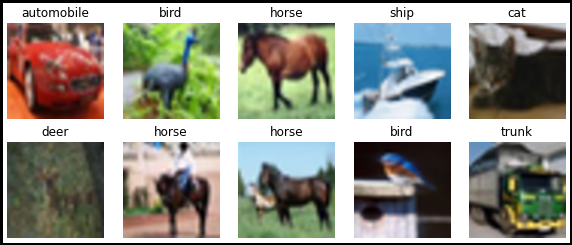

In [61]:
plot_images(x_train, y_train, 5, 10, 0)

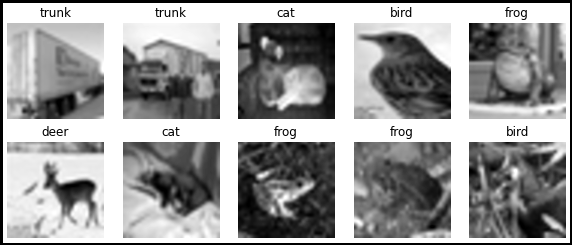

In [62]:
plot_images(x_train_gray, y_train, 15, 10, 1)

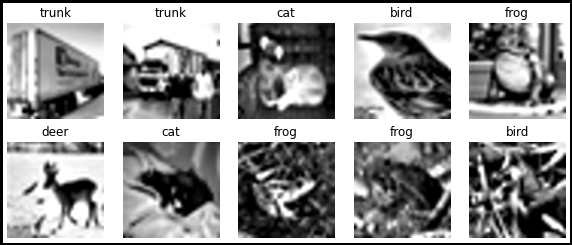

In [63]:
# using derailEnhance and after grayScale 
x_train_det = np.array([cv2.detailEnhance(image, sigma_s=10, sigma_r=0.15) for image in x_train])
x_train_det = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_train_det])

x_test_det = np.array([cv2.detailEnhance(image, sigma_s=10, sigma_r=0.15) for image in x_test])
x_test_det = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in x_test_det])


plot_images(x_train_det, y_train, 15, 10, 1)

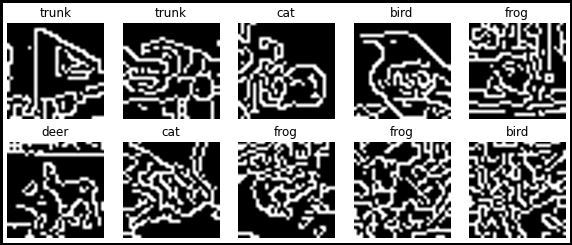

In [64]:
x_train_canny = np.array([cv2.Canny(image, 10, 150) for image in x_train_gray])
x_test_canny = np.array([cv2.Canny(image, 10, 150) for image in x_test_gray])

plot_images(x_train_canny, y_train, 15, 10, 1)

In [65]:
# only while loading the images generate images with rescale, shear, zoom, and horiontal
# train_datagen = ImageDataGenerator(rescale=1/255,
#                                    shear_range=0.2,
#                                    zoom_range=0.2,
#                                    horizontal_flip=True)

# test_datagen = ImageDataGenerator(rescale=1/255)

In [66]:
# Data Normalization
# RGB
x_train, x_test = x_train/255, x_test/255

# Grayscale
x_train_gray, x_test_gray = x_train_gray/255, x_test_gray/255

# canny
x_train_canny, x_test_canny = x_train_canny/255, x_test_canny/255

# detailEnhance
x_train_det, x_test_det = x_train_det/255, x_test_det/255

In [67]:
# label preprocessing
one_hot_encoder  = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
# preprocessing
y_train_ohe = one_hot_encoder.transform(y_train)
y_test_ohe = one_hot_encoder.transform(y_test)

print(y_train_ohe.shape)
print(y_test_ohe.shape)

(50000, 10)
(10000, 10)


# Constructing CNN

In [68]:
# reshape grayscale data to fit the Conv2D format
# grayscale
x_train_gray = x_train_gray.reshape(x_train_gray.shape[0], x_train_gray.shape[1], x_train_gray.shape[2], 1)
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], x_test_gray.shape[1], x_test_gray.shape[2], 1)

# canny
x_train_canny = x_train_canny.reshape(x_train_canny.shape[0], x_train_canny.shape[1], x_train_canny.shape[2], 1)
x_test_canny = x_test_canny.reshape(x_test_canny.shape[0], x_test_canny.shape[1], x_test_canny.shape[2], 1)

# detailEnhance
x_train_det = x_train_det.reshape(x_train_det.shape[0], x_train_det.shape[1], x_train_det.shape[2], 1)
x_test_det = x_test_det.reshape(x_test_det.shape[0], x_test_det.shape[1], x_test_det.shape[2], 1)

# neural net input shape 
input_shape = (x_train_gray.shape[1], x_train_gray.shape[2], 1)
# neural net input shape Color
input_shape_col = (x_train_gray.shape[1], x_train_gray.shape[2], 3)


print('Color')
print(x_train.shape)
print(x_test.shape)
print('Grayscale')
print(x_train_gray.shape)
print(x_test_gray.shape)
print('Canny')
print(x_train_canny.shape)
print(x_test_canny.shape)
print('Y')
print(y_train_ohe.shape)
print(y_test_ohe.shape)

Color
(50000, 32, 32, 3)
(10000, 32, 32, 3)
Grayscale
(50000, 32, 32, 1)
(10000, 32, 32, 1)
Canny
(50000, 32, 32, 1)
(10000, 32, 32, 1)
Y
(50000, 10)
(10000, 10)


In [69]:
""" Deep learning netkwork
1. Model creation
  cnn -> relu -> pooling -> flatten -> fully connected layer
2. Compiling
3. Fiting the model
"""

' Deep learning netkwork\n1. Model creation\n  cnn -> relu -> pooling -> flatten -> fully connected layer\n2. Compiling\n3. Fiting the model\n'

### Grayscale Model format

In [70]:
# model creation
model = Sequential()

# cnn layer 1
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
# cnn layer 2
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# cnn layer 3
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
# cnn layer 4
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# cnn layer 5
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
# cnn layer 1
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))

# flatten
model.add(Flatten())

# hidden layer 1
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
# hidden layer 2
model.add(Dense(128, activation='relu'))
# hidden layer 3
model.add(Dense(64, activation='relu'))
# hidden layer 4
model.add(Dense(64, activation='relu'))
# hidden layer 5
model.add(Dense(10, activation='softmax'))

In [50]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)       

In [71]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['acc'])

# stop the training process once the loss value reaches its minimum point
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [42]:
# detailEnhance
history_det = model.fit(x_train_det, y_train_ohe, epochs=20, batch_size=32, validation_data=(x_test_det, y_test_ohe), callbacks=[es])

2022-10-12 16:36:54.573546: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-10-12 16:36:56.349694: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 17s 6ms/step - loss: 2.3028 - acc: 0.0980 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - acc: 0.0965 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - acc: 0.0964 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - acc: 0.0994 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - acc: 0.0999 - val_loss: 2.3026 - val_acc: 0.1000
Epoch 00005: early stopping


In [72]:
# Grayscale
history_gray = model.fit(x_train_gray, y_train_ohe, epochs=20, batch_size=32, validation_data=(x_test_gray, y_test_ohe), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7822 - acc: 0.3368 - val_loss: 1.3735 - val_acc: 0.4946
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3018 - acc: 0.5347 - val_loss: 1.1550 - val_acc: 0.5958
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0986 - acc: 0.6141 - val_loss: 1.0203 - val_acc: 0.6435
Epoch 4/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.9825 - acc: 0.6557 - val_loss: 0.9270 - val_acc: 0.6824
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8985 - acc: 0.6881 - val_loss: 0.9079 - val_acc: 0.6847
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8280 - acc: 0.7142 - val_loss: 0.8689 - val_acc: 0.7034
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7693 - acc: 0.7337 - val_loss: 0.8695 - val_acc: 0.7042
Epoch 8/20
1563/1563 [==============================] - 9s 6m

In [37]:
# canny
history = model.fit(x_train_canny, y_train_ohe, epochs=20, batch_size=32, validation_data=(x_test_canny, y_test_ohe), callbacks=[es])

2022-10-12 14:02:28.705325: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-10-12 14:02:30.345992: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


1563/1563 [==============================] - 17s 6ms/step - loss: 2.0140 - acc: 0.2472 - val_loss: 1.6329 - val_acc: 0.4206
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5707 - acc: 0.4419 - val_loss: 1.4520 - val_acc: 0.4871
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4186 - acc: 0.4968 - val_loss: 1.3148 - val_acc: 0.5398
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.3268 - acc: 0.5322 - val_loss: 1.2784 - val_acc: 0.5472
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2457 - acc: 0.5614 - val_loss: 1.2401 - val_acc: 0.5631
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1807 - acc: 0.5877 - val_loss: 1.2358 - val_acc: 0.5657
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1235 - acc: 0.6076 - val_loss: 1.2255 - val_acc: 0.5685
Epoch 8/20
1563/1563 [==============================] - 9s 6ms/step - lo

In [109]:
# model creation
model = Sequential()

# cnn layer 1
model.add(Conv2D(32, kernel_size= 2, activation='relu', strides=1, padding='valid', input_shape=input_shape_col))
model.add(MaxPool2D())
# cnn layer 2
model.add(Conv2D(64, kernel_size= 2, activation='relu', strides=1, padding='valid'))
model.add(MaxPool2D())
# cnn layer 3
model.add(Conv2D(128, kernel_size= 2, activation='relu', strides=1, padding='valid'))
model.add(MaxPool2D())

# flatten
model.add(Flatten())

# hidden layer 1
model.add(Dense(123, activation='relu'))
model.add(Dropout(0.3))
# hidden layer 2
model.add(Dense(123, activation='relu'))
# model.add(Dropout(0.5))
# hidden layer 3
model.add(Dense(30, activation='relu'))

# output layer  / softmare converts a vector of values to a probability distribution.
model.add(Dense(10, activation = 'softmax'))

In [110]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['acc'])

# stop the training process once the loss value reaches its minimum point
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)

In [112]:
model.fit(x_train, y_train_ohe, epochs=20, batch_size=32, validation_data=(x_test, y_test_ohe), callbacks=[es])

Epoch 1/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7814 - acc: 0.7321 - val_loss: 0.8858 - val_acc: 0.7071
Epoch 2/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7598 - acc: 0.7435 - val_loss: 0.9034 - val_acc: 0.6992
Epoch 3/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7253 - acc: 0.7541 - val_loss: 0.8756 - val_acc: 0.7104
Epoch 4/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7032 - acc: 0.7617 - val_loss: 0.9067 - val_acc: 0.6923
Epoch 5/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6815 - acc: 0.7700 - val_loss: 0.8583 - val_acc: 0.7079
Epoch 6/20
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6538 - acc: 0.7785 - val_loss: 0.8746 - val_acc: 0.7072
Epoch 7/20
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6343 - acc: 0.7837 - val_loss: 0.9263 - val_acc: 0.6932
Epoch 8/20
1563/1563 [==============================] - 6s 4ms

## Model Evaluated

In [74]:
model.evaluate(x_test_gray, y_test_ohe)

313/313 [==============================] - 1s 3ms/step - loss: 0.8397 - acc: 0.7252


[0.839670717716217, 0.7251999974250793]

# Model evaluation

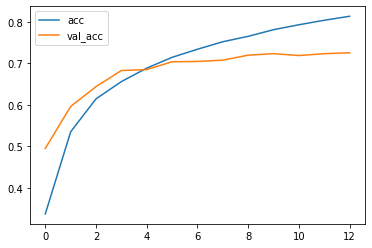

In [82]:
plt.plot(history_gray.history['acc'], label='acc')
plt.plot(history_gray.history['val_acc'], label='val_acc')
plt.legend(loc='upper left')
plt.show()

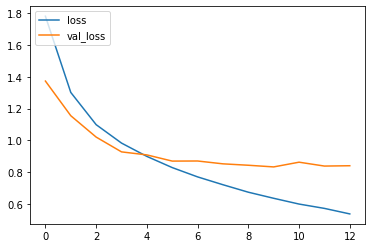

In [83]:
plt.plot(history_gray.history['loss'], label='loss')
plt.plot(history_gray.history['val_loss'], label='val_loss')
plt.legend(loc='upper left')
plt.show()

In [104]:
predictions = model.predict(x_test_gray)
predictions = one_hot_encoder.inverse_transform(predictions)

<BarContainer object of 10 artists>

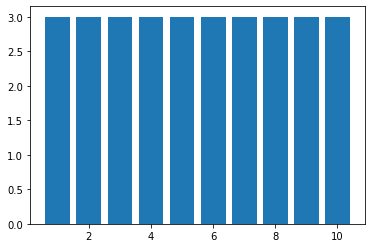

In [103]:
plt.bar(x=[1,2,3,4,5,6,7,8,9,10], height=predictions[0])

In [110]:
cm = confusion_matrix(y_test, predictions)

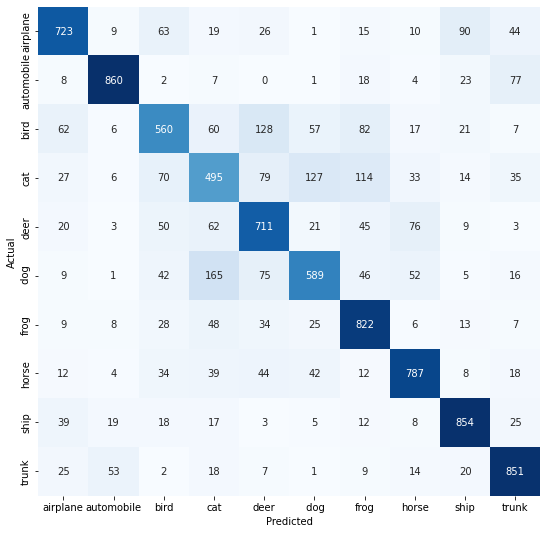

In [121]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=classes, yticklabels=classes, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [122]:
# return to format to visualize the images
x_test_gray = x_test_gray.reshape(x_test_gray.shape[0], x_test_gray.shape[1], x_test_gray.shape[2])
y_test = y_test.astype(int)
predictions = predictions.astype(int)

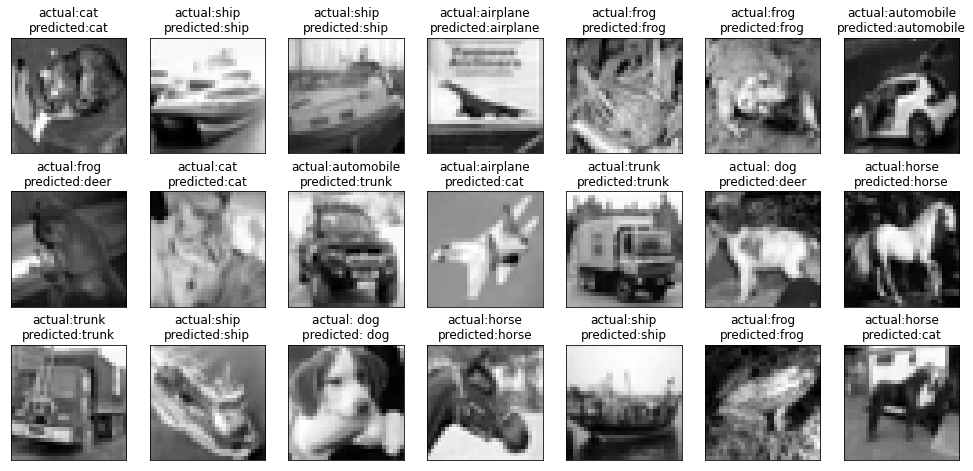

In [129]:
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + classes[y_test[index][0]] + '\n' 
                            + 'predicted:' + classes[predictions[index][0]])
        axes[i,j].imshow(x_test_gray[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()